In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

**Create Dataset**

In [21]:
import os
path = "/content/drive/MyDrive/Handwritten_Hangul_OCR/hangul-images-new"
files = os.listdir(path)
print(files)

['i', 'gi', 'dae', 'ji', 'da', 'sa', 'ha', 'ga', 'ja', 'li']


In [22]:
classes = {'da':0, 'dae':1, 'ga':2, 'gi':3, 'ha':4, 'i':5, 'ja':6, 'ji':7, 'li':8, 'sa':9}

In [23]:
import cv2
x = []
y = []
for cl in classes:
  pth = path+"/"+cl
  for img_name in os.listdir(pth):
    img = cv2.imread(pth+"/"+img_name, 0)
    x.append(img)
    y.append(classes[cl])

In [24]:
pd.Series(y).value_counts()

9    120
8    120
7    120
6    120
5    120
4    120
3    120
2    120
1    120
0    120
dtype: int64

In [25]:
x[0].shape

(64, 64)

In [26]:
print(type(x))
x = np.array(x)
y = np.array(y)
print(type(x))

<class 'list'>
<class 'numpy.ndarray'>


**Analyze Data**

0


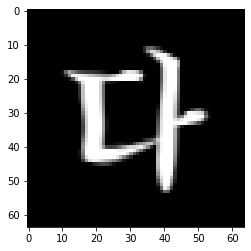

In [27]:
plt.imshow(x[100], cmap="gray")
print(y[100])

**Prepare Data**

In [28]:
x_new = x.reshape(len(x), -1)
print(x_new.shape)
print(y.shape)

(1200, 4096)
(1200,)


In [29]:
64*64

4096

In [30]:
print(x.shape)
print(x.ndim)
print(x_new.ndim)

(1200, 64, 64)
3
2


**Split Data**

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.15, random_state=3)

In [55]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1020, 4096) (1020,)
(180, 4096) (180,)


**Feature Scaling**

In [56]:
print(x_train.max())
print(x_test.max())

255
255


In [57]:
x_train = x_train/255
x_test = x_test/255
print(x_train.max())
print(x_test.max())

1.0
1.0


**Feature Selection: PCA**

**Train Model**

In [58]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

SVC(kernel='linear')

**Prediction**

In [59]:
y_pred = svclassifier.predict(x_test)
y_pred

array([6, 3, 2, 3, 2, 5, 9, 2, 3, 9, 7, 2, 0, 5, 4, 5, 0, 7, 8, 4, 1, 5,
       1, 4, 8, 1, 3, 6, 0, 8, 0, 9, 3, 2, 1, 1, 1, 6, 2, 5, 7, 2, 1, 5,
       9, 1, 7, 5, 2, 6, 3, 8, 4, 3, 0, 0, 7, 2, 1, 7, 1, 4, 7, 8, 8, 2,
       5, 7, 6, 5, 4, 5, 9, 8, 4, 6, 4, 5, 0, 2, 7, 6, 1, 7, 9, 5, 1, 7,
       3, 7, 4, 8, 0, 1, 7, 8, 4, 2, 7, 2, 2, 1, 1, 4, 1, 9, 3, 1, 8, 1,
       3, 7, 1, 2, 1, 0, 9, 8, 0, 2, 3, 5, 1, 5, 6, 5, 0, 3, 2, 8, 7, 6,
       0, 4, 9, 2, 9, 2, 8, 2, 8, 5, 7, 8, 4, 0, 5, 4, 9, 9, 2, 6, 1, 8,
       5, 8, 9, 3, 3, 8, 4, 7, 6, 8, 2, 9, 2, 5, 1, 7, 3, 3, 3, 9, 6, 7,
       4, 2, 0, 1])

**Evaluation**

In [60]:
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Accuracy score:  0.9222222222222223


**Test Model**

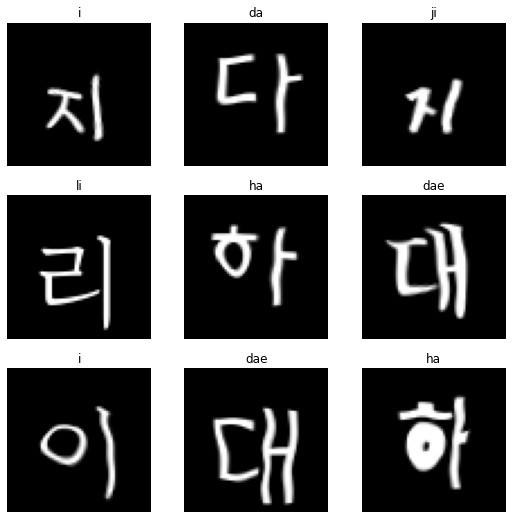

In [61]:
decode = {0:'da', 1:'dae', 2:'ga', 3:'gi', 4:'ha', 5:'i', 6:'ja', 7:'ji', 8:'li', 9:'sa'}
plt.figure(figsize=(9, 9))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(x_test[i+15].reshape(64, 64), cmap='gray')
  plt.title(decode[y_pred[i+15]])
  plt.axis('off')

In [62]:
d = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
d[d['Actual']!=d['Predicted']]

,Actual,Predicted
2,6,2
12,7,0
15,7,5
34,5,1
43,7,5
45,5,1
46,8,7
51,0,8
68,9,6
69,8,5


**Test model on real data**

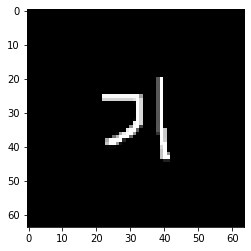

In [63]:
img = cv2.resize(cv2.imread("/content/drive/MyDrive/Handwritten_Hangul_OCR/test5.png", 0), (64, 64))
plt.imshow(img, cmap='gray')

In [64]:
img = img.reshape(1, -1)/255

In [65]:
decode[svclassifier.predict(img)[0]]

'gi'

**Confusion Matrix**

In [66]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[13  0  0  0  0  0  0  0  1  0]
 [ 0 22  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  1  0  0  0]
 [ 0  0  1 17  0  0  0  0  0  0]
 [ 0  0  0  0 16  0  0  0  0  0]
 [ 0  2  1  0  0 16  0  0  0  0]
 [ 0  0  2  0  0  0 10  0  0  0]
 [ 1  0  0  0  0  2  0 19  0  0]
 [ 0  0  0  0  0  1  0  1 18  0]
 [ 0  0  0  0  0  0  1  0  0 15]]
